## Project Name: Customer Churn Prediction
In a business customer churn means, the instance of customers leaving the business. For Example the interner user may stop using some special type of service and move on to some other service or bank customers may close their account and move on to some othen bank. In this case the assotiation may look investigate into the matter, why actually these customers are leaving. These invetigation may help the business improvement. Here we are doing this with the help of deep learning. We are using the Telco Customer Churn Dataset from kaggle. 

### Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Calling necessary libraries

In [45]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Calling the dataset

In [46]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [47]:
# lets see the shape of the data
df.shape

(7043, 21)

In [48]:
# we are not going to use the 'customerID' column in the model. so it should be deleted
df.drop('customerID', axis=1, inplace=True)

In [49]:
# now lets find out the datatypes
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [50]:
# from the datatypes we can observe that the 'TotalCharges' is given as object. but it should be a float number. lets convert it
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

# this rows have their total charges as ' '. we are going to delete these rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
df = df[df['TotalCharges']!=' ']
df.shape

(7032, 20)

In [52]:
# now we will finally  convert the 'TotalCharges' into float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [53]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [54]:
# now here the tenure means how long time a customer is getting a serving. this indicates the loyalty of the customer. let's see how many loyal customers 
# are leaving
tenure_yes = df[df['Churn']=="Yes"]['tenure'] 
tenure_no = df[df['Churn']=="No"]['tenure'] 

In [55]:
import matplotlib.pyplot as plt

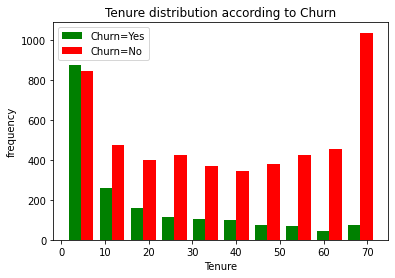

In [56]:
plt.hist([tenure_yes, tenure_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('frequency')
plt.title('Tenure distribution according to Churn')
plt.legend()

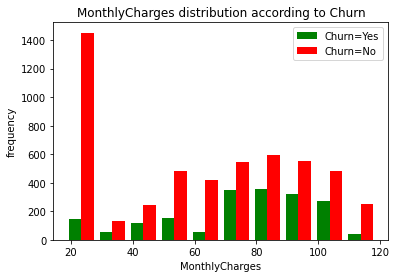

In [57]:
MonthlyCharges_yes = df[df['Churn']=="Yes"]['MonthlyCharges'] 
MonthlyCharges_no = df[df['Churn']=="No"]['MonthlyCharges'] 

plt.hist([MonthlyCharges_yes, MonthlyCharges_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('MonthlyCharges')
plt.ylabel('frequency')
plt.title('MonthlyCharges distribution according to Churn')
plt.legend()

In [58]:
# let's find out the unique values of the column

# this function shows the unique values of the categorical columns
def show_unique_values(df):
    for column in df.columns:
        if df[column].dtype == 'O':
            print(f'{column}: {df[column].unique()}')  

In [59]:
show_unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [60]:
# let's replace 'No internet service', 'No phone service' with 'No'
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [61]:
show_unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [62]:
# lets change all 'Yes' to 1 and all 'No' to 0
Yes_No_column = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in Yes_No_column: 
  df[column] = df[column].map({'Yes': 1, 'No': 0})

show_unique_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [63]:
# let's encode the remaining text based columns
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}) 

show_unique_values(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [64]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract', 'PaymentMethod'])

show_unique_values(df)

In [68]:
# lets check the datatypes again
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [70]:
# lets scale down the numerical features
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### X and y formation and Train-Test split

In [72]:
from  sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [73]:
# lets see the dimension of the splited data

print(f'''
X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
''')


X_train: (5625, 26)
y_train: (5625,)
X_test: (1407, 26)
y_test: (1407,)



### Model Building

In [74]:
import tensorflow as tf
from tensorflow import keras

In [77]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4923 - accuracy: 0.7484
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7941
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7968
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.7977
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8039
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8021
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8030
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4127 - accura

### Model Evaluation

In [78]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.7854


[0.44744035601615906, 0.7853589057922363]

In [89]:
y_pred = [(1 if x[0]>0.5 else 0) for x in model.predict(X_test)]

In [91]:
# let's get the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1052
           1       0.58      0.56      0.57       355

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407

